In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [85]:
import pandas as pd

df = pd.read_excel('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC_Final_Data/EC_Community_Update.xlsx')
avg_paper_threshold = 1/3

def create_community_author(df, avg_paper_threshold):

    # Calculate the first year a name has appeared
    first_year = df.groupby('Name')['Year'].min()

    # Calculate 2023 - first_year
    years_since_first = 2023 - first_year

    # Calculate the total number of papers by each author
    total_papers = df['Name'].value_counts()

    # Calculate the average number of papers the author publishes each year
    avg_papers_per_year = total_papers / years_since_first

    # Filter authors based on the threshold
    authors_above_threshold = avg_papers_per_year[avg_papers_per_year > avg_paper_threshold].index

    # Filter the original DataFrame to keep only rows of these authors
    df_community = df[df['Name'].isin(authors_above_threshold)]

    return df_community

df_community = create_community_author(df, avg_paper_threshold)
df_community


,paper name,Year,Name,Affiliation,ECON,CS,OR,MATH,Cannot Identify,Link,Note,Math & Statistics
0,Auctions with online supply,2010,Aaron Roth,Upenn CS,NaN,1.0,NaN,NaN,NaN,https://www.cis.upenn.edu/~aaroth/,NaN,NaN
1,Selling privacy at auction,2011,Aaron Roth,Upenn CS,NaN,1.0,NaN,NaN,NaN,https://www.cis.upenn.edu/~aaroth/,NaN,NaN
2,"Conducting truthful surveys, cheaply",2012,Aaron Roth,Upenn CS,NaN,1.0,NaN,NaN,NaN,https://www.cis.upenn.edu/~aaroth/,NaN,NaN
3,Bounds for the query complexity of approximate...,2014,Aaron Roth,Upenn CS,NaN,1.0,NaN,NaN,NaN,https://www.cis.upenn.edu/~aaroth/,NaN,NaN
4,Asymptotically truthful equilibrium selection ...,2014,Aaron Roth,Upenn CS,NaN,1.0,NaN,NaN,NaN,https://www.cis.upenn.edu/~aaroth/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2355,Price of Privacy in the Keynesian Beauty Contest,2019,Zachary Schutzman,"postdoc, MIT, Institute for Data, Systems, and...",NaN,NaN,1.0,NaN,NaN,https://zachschutzman.com/assets/cv/schutzman_...,NaN,NaN
2356,Algorithms and Learning for Fair Portfolio Design,2021,Zachary Schutzman,"postdoc, MIT, Institute for Data, Systems, and...",NaN,NaN,1.0,NaN,NaN,https://zachschutzman.com/assets/cv/schutzman_...,NaN,NaN
2357,Optimal Public Provision of Private Goods,2021,Zi Yang Kang,"AP, Economics, University of Toronto",1.0,NaN,NaN,NaN,NaN,https://ziyangkang.com/,NaN,NaN
2358,Contracting and Vertical Control by a Dominant...,2022,Zi Yang Kang,"AP, Economics, University of Toronto",1.0,NaN,NaN,NaN,NaN,https://ziyangkang.com/,NaN,NaN


#### We define researchers who have published more than 3
#### papers on EC until 2022 as community researchers

In [86]:
df_all = pd.read_excel('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC_Final_Data/EC_Author_Info.xlsx')
# df_community = pd.read_excel('/Users/haichuan/Dropbox/Academic_Paper_Signaling/EC_Final_Data/EC_Community_Author.xlsx')
df_community = create_community_author(df, avg_paper_threshold)
all_author_count = df_all.drop_duplicates(subset='Name').shape[0]
community_author_count = df_community.drop_duplicates(subset='Name').shape[0]
non_community_author_count = all_author_count - community_author_count

print("{} among {} researchers have published more than 2 papers on EC and publish more than {} papers every year since their first ever publication on EC".format(community_author_count, all_author_count, avg_paper_threshold))

259 among 1843 researchers have published more than 2 papers on EC and publish more than 0.3333333333333333 papers every year since their first ever publication on EC


In [87]:
df_community = create_community_author(df, avg_paper_threshold)
community_author_count = df_community.drop_duplicates(subset='Name').shape[0]
community_paper_count = df_community.drop_duplicates(subset='paper name').shape[0]

all_author_count = df_all.drop_duplicates(subset='Name').shape[0]
non_community_author_count = all_author_count - community_author_count


all_paper_count = df_all.drop_duplicates(subset='paper name').shape[0]
non_community_paper_count = all_paper_count - community_paper_count

print("On average, a community researcher publishes {} papers on EC until 2022".format(community_paper_count/community_author_count))
print("On average, a non-community researcher publishes {} papers on EC until 2022".format(non_community_paper_count/non_community_author_count))


On average, a community researcher publishes 4.057915057915058 papers on EC until 2022
On average, a non-community researcher publishes 0.23547979797979798 papers on EC until 2022


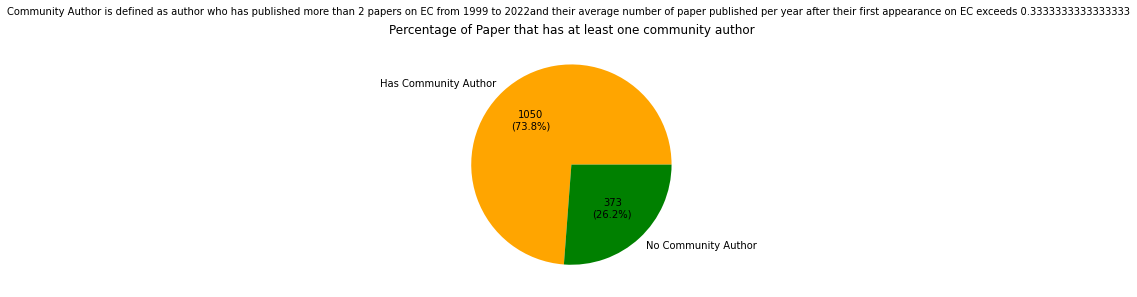

In [88]:
df_community = create_community_author(df, avg_paper_threshold)
all_paper_count = df_all.drop_duplicates(subset='paper name').shape[0]
community_paper_count = df_community.drop_duplicates(subset='paper name').shape[0]
non_community_paper_count = all_paper_count - community_paper_count

# Values and labels for the pie chart
values = [community_paper_count, non_community_paper_count]
labels = ['Has Community Author', 'No Community Author']
colors = ['orange', 'green']

# Plotting the pie chart
fig, ax = plt.subplots()
# Set the background color for the figure and the axis
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{absolute}\n({pct:.1f}%)"

ax.pie(values, labels=labels, colors=colors, autopct=lambda pct: func(pct, values),
       textprops=dict(color="black"))

plt.title("Percentage of Paper that has at least one community author", color = 'black')
plt.figtext(0.5, 1.02, "Community Author is defined as author who has published more than 2 papers on EC from 1999 to 2022" +
            f"and their average number of paper published per year after their first appearance on EC exceeds {avg_paper_threshold}", 
            ha="center", va="top", fontsize=10, color="black")

plt.tight_layout()
plt.show()

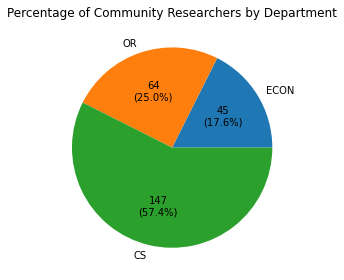

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
df_community = create_community_author(df, avg_paper_threshold)
# Drop duplicate authors
df_unique = df_community.drop_duplicates(subset='Name')

# Count the number of researchers in each department
econ_count = df_unique[df_unique['ECON'] == 1].shape[0]
or_count = df_unique[df_unique['OR'] == 1].shape[0]
cs_count = df_unique[df_unique['CS'] == 1].shape[0]

# Values and labels for the pie chart
values = [econ_count, or_count, cs_count]
labels = ['ECON', 'OR', 'CS']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting the pie chart
fig, ax = plt.subplots()
# Set the background color for the figure and the axis
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{absolute}\n({pct:.1f}%)"

ax.pie(values, labels=labels, colors=colors, autopct=lambda pct: func(pct, values),
       textprops=dict(color="black"))

plt.title("Percentage of Community Researchers by Department", color = 'black')
plt.tight_layout()
plt.show()


/Users/haichuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/haichuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


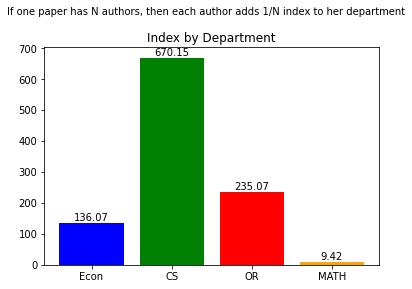

In [90]:
df_community = create_community_author(df, avg_paper_threshold)

# Calculate the total authors for each paper
df_community['Total Authors'] = df_community.groupby('paper name')['Name'].transform('count')
# Calculate the index for each department per paper
for dept in ['ECON', 'CS', 'OR', 'MATH']:
    df_community[dept] = df_community.apply(lambda row: 1/row['Total Authors'] if row[dept] == 1 else 0, axis=1)

# Sum the indices for each department
econ_index = df_community['ECON'].sum()
cs_index = df_community['CS'].sum()
or_index = df_community['OR'].sum()
math_index = df_community['MATH'].sum()

# Sum the indices for each department
indices = {
    'Econ': df_community['ECON'].sum(),
    'CS': df_community['CS'].sum(),
    'OR': df_community['OR'].sum(),
    'MATH': df_community['MATH'].sum()
}

# Create the bar chart
fig, ax = plt.subplots()

bars = ax.bar(indices.keys(), indices.values(), color=['blue', 'green', 'red', 'orange'])

# Add annotations above the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
            f"{bar.get_height():.2f}", 
            ha='center', va='bottom')

# Add title and explanation
ax.set_title('Index by Department')
plt.figtext(0.5, 1.02, "If one paper has N authors, then each author adds 1/N index to her department", 
            ha="center", va="top", fontsize=10, color="black")

# Display the plot
plt.show()

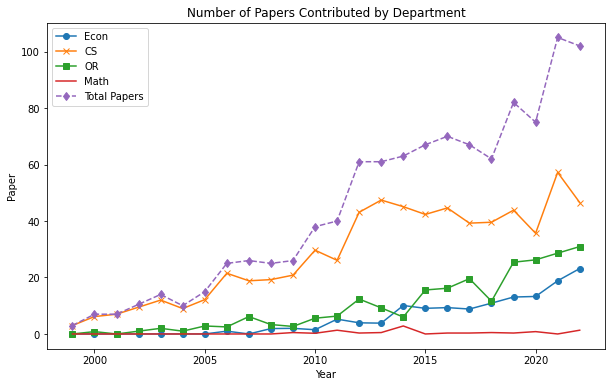

In [91]:
df_community = create_community_author(df, avg_paper_threshold)
# Calculate the number of authors for each paper
paper_author_count = df_community.groupby(['paper name', 'Year']).size().reset_index(name='author_count')

# Merge this count back into the original DataFrame
df_community = pd.merge(df_community, paper_author_count, on=['paper name', 'Year'])

# Calculate the index for each department and author, which is 1 divided by the author_count
df_community['index_econ'] = df_community['ECON'] / df_community['author_count']
df_community['index_cs'] = df_community['CS'] / df_community['author_count']
df_community['index_or'] = df_community['OR'] / df_community['author_count']
df_community['index_math'] = df_community['MATH'] / df_community['author_count']

# Now, sum these index values by year for each department
yearly_index = df_community.groupby('Year').agg({
    'index_econ': 'sum',
    'index_cs': 'sum',
    'index_or': 'sum',
    'index_math': 'sum',
    'paper name': pd.Series.nunique
}).reset_index()

year_lst = yearly_index['Year'].tolist()
econ_index_by_year = yearly_index['index_econ'].tolist()
or_index_by_year = yearly_index['index_or'].tolist()
cs_index_by_year = yearly_index['index_cs'].tolist()
math_index_by_year = yearly_index['index_math'].tolist()
total_num_by_year = yearly_index['paper name'].tolist()

year_lst.insert(3, 2002)
econ_index_by_year.insert(3, (econ_index_by_year[2] + econ_index_by_year[3])/2)
or_index_by_year.insert(3, (or_index_by_year[2] + or_index_by_year[3])/2)
cs_index_by_year.insert(3, (cs_index_by_year[2] + cs_index_by_year[3])/2)
math_index_by_year.insert(3,(math_index_by_year[2] + math_index_by_year[3])/2)
total_num_by_year.insert(3, (total_num_by_year[2] + total_num_by_year[3])/2)

# If you'd like to visualize this data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_lst, econ_index_by_year, label='Econ', marker='o')
plt.plot(year_lst, cs_index_by_year, label='CS', marker='x')
plt.plot(year_lst, or_index_by_year, label='OR', marker='s')
plt.plot(year_lst, math_index_by_year, label='Math')
plt.plot(year_lst, total_num_by_year, label='Total Papers', marker='d', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Paper')
plt.title('Number of Papers Contributed by Department')
plt.legend()

plt.show()


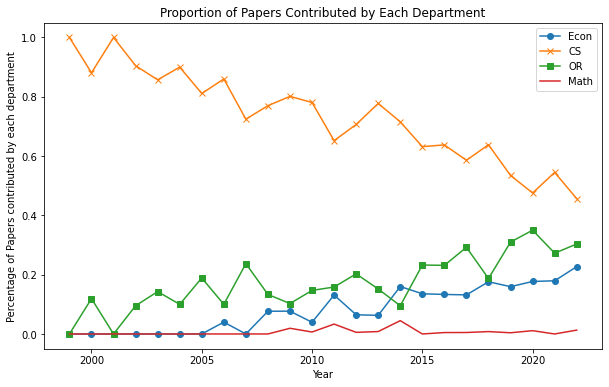

In [92]:
import pandas as pd

df_community = create_community_author(df, avg_paper_threshold)

# Calculate the number of authors for each paper
paper_author_count = df_community.groupby(['paper name', 'Year']).size().reset_index(name='author_count')

# Merge this count back into the original DataFrame
df_community = pd.merge(df_community, paper_author_count, on=['paper name', 'Year'])

# Calculate the index for each department and author, which is 1 divided by the author_count
df_community['index_econ'] = df_community['ECON'] / df_community['author_count']
df_community['index_cs'] = df_community['CS'] / df_community['author_count']
df_community['index_or'] = df_community['OR'] / df_community['author_count']
df_community['index_math'] = df_community['MATH'] / df_community['author_count']

# Now, sum these index values by year for each department
yearly_index = df_community.groupby('Year').agg({
    'index_econ': 'sum',
    'index_cs': 'sum',
    'index_or': 'sum',
    'index_math': 'sum',
    'paper name': pd.Series.nunique
}).reset_index()

year_lst = yearly_index['Year'].tolist()
econ_index_by_year = yearly_index['index_econ'].tolist()
or_index_by_year = yearly_index['index_or'].tolist()
cs_index_by_year = yearly_index['index_cs'].tolist()
math_index_by_year = yearly_index['index_math'].tolist()
total_num_by_year = yearly_index['paper name'].tolist()

year_lst.insert(3, 2002)
econ_index_by_year.insert(3, (econ_index_by_year[2] + econ_index_by_year[3])/2)
or_index_by_year.insert(3, (or_index_by_year[2] + or_index_by_year[3])/2)
cs_index_by_year.insert(3, (cs_index_by_year[2] + cs_index_by_year[3])/2)
math_index_by_year.insert(3,(math_index_by_year[2] + math_index_by_year[3])/2)
total_num_by_year.insert(3, (total_num_by_year[2] + total_num_by_year[3])/2)

econ_percentage = []
or_percentage = []
cs_percentage = []
math_percentage = []


for i in range(len(year_lst)):
    if (total_num_by_year[i] != 0):
        econ_percentage.append(econ_index_by_year[i]/total_num_by_year[i])
        cs_percentage.append(cs_index_by_year[i]/total_num_by_year[i])
        or_percentage.append(or_index_by_year[i]/total_num_by_year[i])
        math_percentage.append(math_index_by_year[i]/total_num_by_year[i])
  

# If you'd like to visualize this data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(year_lst, econ_percentage, label='Econ', marker='o')
plt.plot(year_lst, cs_percentage, label='CS', marker='x')
plt.plot(year_lst, or_percentage, label='OR', marker='s')
plt.plot(year_lst, math_percentage, label='Math')


plt.xlabel('Year')
plt.ylabel('Percentage of Papers contributed by each department')
plt.title('Proportion of Papers Contributed by Each Department')
plt.legend()

plt.show()

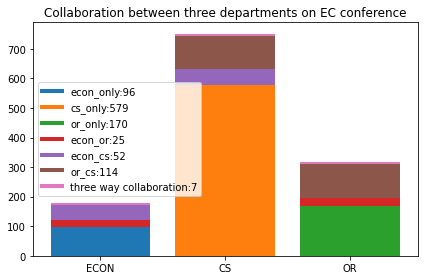

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data - You can replace this with reading your Excel file
df_community = create_community_author(df, avg_paper_threshold)

grouped = df_community.groupby('paper name').sum(['ECON', 'CS', 'OR']).reset_index()

# Counts
econ_only = len(grouped[(grouped['ECON'] > 0) & (grouped['OR'] == 0) & (grouped['CS'] == 0)])
or_only = len(grouped[(grouped['OR'] > 0) & (grouped['ECON'] == 0) & (grouped['CS'] == 0)])
cs_only = len(grouped[(grouped['CS'] > 0) & (grouped['ECON'] == 0) & (grouped['OR'] == 0)])

# Collaborations
econ_or = len(grouped[(grouped['ECON'] > 0) & (grouped['OR'] > 0) & (grouped['CS'] == 0)])
econ_cs = len(grouped[(grouped['ECON'] > 0) & (grouped['CS'] > 0) & (grouped['OR'] == 0)])
or_cs = len(grouped[(grouped['OR'] > 0) & (grouped['CS'] > 0) & (grouped['ECON'] == 0)])
three_way = len(grouped[(grouped['ECON'] > 0) & (grouped['CS'] > 0) & (grouped['OR'] > 0)])

labels = ['ECON', 'CS', 'OR']

econ_values = [econ_only, econ_or, econ_cs, three_way]
cs_values = [cs_only, econ_cs, or_cs, three_way]
or_values = [or_only, econ_or, or_cs, three_way]


# Colors and legend labels
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
legend_labels = [(colors[0], f'econ_only:{econ_only}'),
                 (colors[1], f'cs_only:{cs_only}'),
                 (colors[2], f'or_only:{or_only}'),
                 (colors[3], f'econ_or:{econ_or}'),
                 (colors[4], f'econ_cs:{econ_cs}'),
                 (colors[5], f'or_cs:{or_cs}'),
                 (colors[6], f'three way collaboration:{three_way}')]

# Plotting
fig, ax = plt.subplots()

# Plot Econ bar
ax.bar(labels[0], econ_values[0], color=colors[0], label=legend_labels[0][1])
ax.bar(labels[0], econ_values[1], bottom=econ_values[0], color=colors[3], label=legend_labels[3][1])
ax.bar(labels[0], econ_values[2], bottom=econ_values[0] + econ_values[1], color=colors[4], label=legend_labels[4][1])
ax.bar(labels[0], econ_values[3], bottom=econ_values[0] + econ_values[1] + econ_values[2], color=colors[6], label=legend_labels[6][1])

# Plot CS bar
ax.bar(labels[1], cs_values[0], color=colors[1], label=legend_labels[1][1])
ax.bar(labels[1], cs_values[1], bottom=cs_values[0], color=colors[4], label=legend_labels[4][1])
ax.bar(labels[1], cs_values[2], bottom=cs_values[0] + cs_values[1], color=colors[5], label=legend_labels[5][1])
ax.bar(labels[1], cs_values[3], bottom=cs_values[0] + cs_values[1] + cs_values[2], color=colors[6], label=legend_labels[6][1])

# Plot OR bar
ax.bar(labels[2], or_values[0], color=colors[2], label=legend_labels[2][1])
ax.bar(labels[2], or_values[1], bottom=or_values[0], color=colors[3], label=legend_labels[3][1])
ax.bar(labels[2], or_values[2], bottom=or_values[0] + or_values[1], color=colors[5], label=legend_labels[5][1])
ax.bar(labels[2], or_values[3], bottom=or_values[0] + or_values[1] + or_values[2], color=colors[6], label=legend_labels[6][1])


# ax.legend(handles=handles, labels=[l[1] for l in legend_labels])
labels = [legend_labels[0][1], # econ only
          legend_labels[1][1], # cs only
           legend_labels[2][1], # or only
          legend_labels[3][1], # econ or
          legend_labels[4][1], # econ cs
          legend_labels[5][1], # cs or
          legend_labels[6][1], # three way
]
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=legend_labels[0][0], lw=4),
                Line2D([0], [0], color=legend_labels[1][0], lw=4),
                Line2D([0], [0], color=legend_labels[2][0], lw=4),
                Line2D([0], [0], color=legend_labels[3][0], lw=4),
                Line2D([0], [0], color=legend_labels[4][0], lw=4),
                Line2D([0], [0], color=legend_labels[5][0], lw=4),
                Line2D([0], [0], color=legend_labels[6][0], lw=4)
]


ax.legend(custom_lines, labels)

plt.title("Collaboration between three departments on EC conference")
plt.tight_layout()
plt.show()